## Layer wise Relevance Propagation
Layer-wise relevance propagation (LRP) is a backward explanation technique for neural networks. A forward pass is first computed and the activations $ a_j $, are stored at each layer. Then, instead of backpropagating gradients, LRP backpropagates relevance values $ R $, starting from the output neuron. A positive relevance indicates that a neuron contributes in favour of the prediction, whereas negative relevance indicates contribution against the prediction


If $ j $ and $ k $ are neurons at two consecutive layers of the neural network, such that $ j $ is in the lower layer (closest to the input) and $ k$ is the upper layer (closest to the output). We say the the forwards contribution from $ j \rightarrow k $ is $ z_{jk} = a_j w_{jk} $. Where $ a_j $ is the activation at neuron $ j $  such that $ a_k = \max(0, \sum _{0,j} a_jw_{jk} )$ and $ w_{jk} $ is the weight. We set $ a_0 = 1 $ and $ w_{0k} $ to be the neuron bias.



We define the propagating relevance score at a given layer onto the neurons of the lower layer to be
\begin{equation}
    R_j = \sum _k \frac{z_{jk}}{\sum_j z_{jk} } R_k
\end{equation}





This satisfies the layer-wise conservation property $ \sum _j R_j = \sum _k R_k $ and consequently the global conservation property $ \sum _i R_i = f(x) $

We can see the LRP procedure in the figure below.

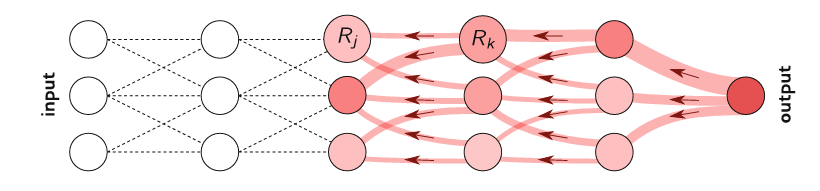
### Propagation rules

We will include three propagation rules in the implementation of LRP, they are the following.

Basic Rule, LRP-0, which uses the raw contributions with no stabilisations

$ R_j = \sum _k \frac{a_j w_{jk} }{\sum_{0,j}a_j w_{jk} } R_k $


Epsilon Rule, LPR-$\epsilon$

$ R_j = \sum _k \frac{a_j w_{jk} }{\epsilon + \sum_{0,j}a_j w_{jk} } R_k $

$ \epsilon $ prevents division by small denominators. It absorbs some of the relevance when the contributions of the activation $ k $ are weak or contradictory.


Gamma Rule, LRP-$\gamma$

$ R_j = \sum _k \frac{a_j ( w_{jk} + \gamma w_{jk}^+) }{\sum_{0,j}a_j ( w_{jk} + \gamma w_{jk}^+) } R_k $

This favors the effect of the positive contributions, and $ \gamma $ controls how much is favoured. As $ \gamma $ increases the negative contributions start to disappear.


We will use LRP-0 for the upper layers since the activations are stable and linear.
In the middle layer there are more noise and so using LRP-$\epsilon $ will filter the most accurate factors.
In the lower layer we will use LRP-$\gamma $ as it spreads the relevance uniformly across the features.




### Implementing LRP


We will consider a general rule:
\begin{equation}
     R_j = \sum _k \frac{a_j \rho (w_{jk}) }{\epsilon + \sum_{0,j}a_j \rho ( w_{jk}) } R_k
\end{equation}

And the computation can be broken down into the following steps:



\begin{array}{ll}
\forall k:\quad z_k = \epsilon + \sum_{j} a_j \cdot \rho(w_{jk})
    & \text{(forward pass)} \\[6pt]
\forall k:\quad s_k = \frac{R_k}{z_k}
    & \text{(element-wise division)} \\[6pt]
\forall j:\quad c_j = \sum_{k} \rho(w_{jk}) \cdot s_k
    & \text{(backward pass)} \\[6pt]
\forall j:\quad R_j = a_j \cdot c_j
    & \text{(element-wise product)}
\end{array}


We can also express $ c_j $ as the gradient so
$ c_j = [ \nabla ( \sum_k z_k (a) \dot s_k )]_j $.




implementing this rule in code gives us:

```
def relprop(a, layer, R):
    z = epsilon + rho(layer).forward(a)
    s = R / (z + 1e-9)
    (z * s.data).sum().backward()
    c = a.grad
    R = a * c
    return R
```
### References
https://www.sciencedirect.com/science/article/pii/S1051200417302385#se0120

Layer-Wise Relevance Propagation: An Overview:
https://link.springer.com/chapter/10.1007/978-3-030-28954-6_10

